In [1]:
import pandas as pd

df = pd.read_csv("../creditcard.csv")
print(df.shape, "\n")
df.head()

(284807, 31) 



,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Data Preparation

In [2]:
label_df = df["Class"]

In [3]:
from sklearn.preprocessing import StandardScaler

# sampled_df = df.sample(n = 100000)
scaled_df = StandardScaler().fit_transform(df.drop("Class", axis = 1))

### Generate Clusters

Key Parameters:
- min_cluster_size: The minimum number of points to form a dense cluster. Crucial for controlling noise and identifying meaningful clusters. Start with smaller values and experiment.
- min_samples: The number of points a neighborhood must contain for a point to be considered a core point. A larger value will result in more points being classified as noise. Usually smaller than min_cluster_size.
- metric: The distance metric to use. 'euclidean' (default), 'manhattan', 'cosine', etc. Consider based on your data's nature.
- cluster_selection_method: 'eom' (Excess of Mass) or 'leaf'. 'eom' is generally preferred as it's more robust.


Choosing a distance metric: 
- Euclidean Distance: Straight-line distance between two points. Effective when features are continuous, have similar scales, and the geometric distance is meaningful.
- Manhatan Distance (L1): The sum of the absolute differences between the coordinates of two points. Also known as "city block" distance. Less sensitive to outliers than euclidean distance. Useful when path between points is more important than direct distance.  
- Minkowski Distance: A generalization of Euclidean and Manhattan distances. 


[SK-Learn HDBScan Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.HDBSCAN.html)

In [ ]:
from sklearn.cluster import HDBSCAN

hdbscan = HDBSCAN(min_cluster_size = 5, 
                  min_samples = 2, 
                  metric = 'euclidean', 
                  cluster_selection_method = 'eom')

clusters = hdbscan.fit_predict(scaled_df)
label_df["Cluster"] = clusters

## Visualize Dataset

In [8]:
import umap
import umap.plot

reducer = umap.UMAP()
embedding = reducer.fit(scaled_df)

<Axes: >

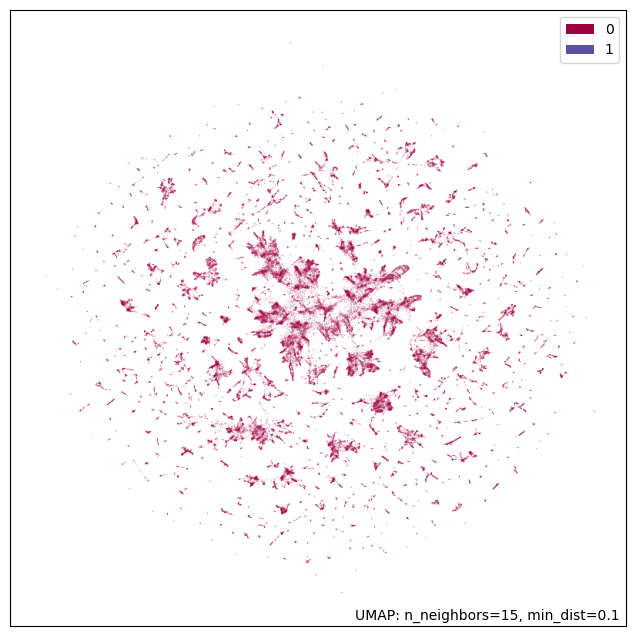

In [11]:
umap.plot.points(embedding, labels = df["Class"])

In [5]:

import matplotlib.pyplot as plt 
import seaborn as sns

def umap_scatter_plot(scaled_df, df_class_column):



    
    
    # if embedding.ndim == 2 and embedding.shape[1] >= 2:
        
    #     plt.figure(figsize=(12, 10))
    #     colours = [sns.color_palette()[x] for x in df_class_column]
                
    #     plt.scatter(
    #         x = embedding[:, 0],
    #         y = embedding[:, 1],
    #         c = colours,
    #         s = 1
    #         )

    #     plt.gca().set_aspect('equal', 'datalim')
    #     plt.title('UMAP projection of the fraud dataset', fontsize = 24)
    #     plt.show()
        
        
    # else: 
    #     print("Error: `embedding` should be a 2-dimensional array with at least 2 columns.")
        
        
umap_scatter_plot(scaled_df, df["Class"])

/home/dshebb/miniconda3/envs/py-3.12/lib/python3.12/site-packages/numba/np/ufunc/dufunc.py:343: NumbaWarning: Compilation requested for previously compiled argument types ((uint32,)). This has no effect and perhaps indicates a bug in the calling code (compiling a ufunc more than once for the same signature
  warnings.warn(msg, errors.NumbaWarning)
/home/dshebb/miniconda3/envs/py-3.12/lib/python3.12/site-packages/numba/np/ufunc/dufunc.py:343: NumbaWarning: Compilation requested for previously compiled argument types ((uint32,)). This has no effect and perhaps indicates a bug in the calling code (compiling a ufunc more than once for the same signature
  warnings.warn(msg, errors.NumbaWarning)
/home/dshebb/miniconda3/envs/py-3.12/lib/python3.12/site-packages/numba/np/ufunc/dufunc.py:343: NumbaWarning: Compilation requested for previously compiled argument types ((uint32,)). This has no effect and perhaps indicates a bug in the calling code (compiling a ufunc more than once for the same si

ValueError: Could not find embedding attribute of umap_object

In [3]:
# UMAP(a = None,
#      angular_rp_forest = False,
#      b = None,
#      force_approximation_algorithm = False, 
#      init = 'spectral', 
#      learning_rate = 1.0,
#      local_connectivity = 1.0, 
#      low_memory = False, 
#      metric='euclidean',
#      metric_kwds=None, 
#      min_dist=0.1, 
#      n_components=2, 
#      n_epochs=None,
#      n_neighbors=15, 
#      negative_sample_rate=5, 
#      output_metric='euclidean',
#      output_metric_kwds=None, 
#      random_state=42, 
#      repulsion_strength=1.0,
#      set_op_mix_ratio=1.0, 
#      spread=1.0, 
#      target_metric='categorical',
#      target_metric_kwds=None, 
#      target_n_neighbors=-1, 
#      target_weight=0.5,
#      transform_queue_size=4.0, 
#      transform_seed=42, 
#      unique=False, 
#      verbose=False)

NameError: name 'UMAP' is not defined